## Principal Component Analysis using SVD: Explain

Author: RZ Wong
Date: 29th May 2020

This document explains the PCA constructs in Singular Value Decomposition (SVD) using sklearn.decomposition.PCA library.

Demonstrate PCA on the iris dataset.

In [2]:
# import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

from scipy import linalg

In [145]:
# load dataset
iris = datasets.load_iris()
X = iris.data

variable_names = iris.feature_names

In [146]:
# display dataset 0 to 10 rows
X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [147]:
# PCA
pca = decomposition.PCA()       # set parameters for PCA, default will return all components
X_pca = pca.fit_transform(X)    # apply PCA on data X, return the PC scores stored in X_pca

In [151]:
# PCA can be achieved through the eigen-decomposition of the covariance matrix from X.
# The eigen-decomposition required a square matrix, but SVD able to works on non-square matrices.

# The sklearn.decomposition.PCA library use Singular Value Decomposition. In SVD, the original data matrix X can be represented by U, S, V that can be written as:
#             X = USV.T
#    where X is the original matrix (n,p)
#          U is the left orthogonal matrix (n,r), the eigenvector of np.dot(X, X.T)
#          V.T is the right orthogonal matrix (p,r), the eigenvector of np.dot(X.T, X)
#          S is the diagonal matrix with r elements (r,), root of the all positive eigenvalues from np.dot(X, X.T) and  
#               np.dot(X.T, X), called singlar values


# Center data
mu = np.mean(X, axis=0)
Xtemp = X-mu

# run SVD
U, s, Vh = linalg.svd(Xtemp, full_matrices=False)

# svd_flip
max_abs_cols = np.argmax(np.abs(U), axis=0)
signs = np.sign(U[max_abs_cols, range(U.shape[1])])
U *= signs
Vh *= signs[:, np.newaxis]

# print shape of U, S, V
print(U.shape, s.shape, Vh.shape)

(150, 4) (4,) (4, 4)


In [158]:
# Since eigenvalues (from the covariance eigen-decomposition) are the variance of the respective PC, 
# the singular value (from SVD) related to the eigenvalues (lambda) through:
#             lambda = s**2 / (n-1)


# check the above statement
print("Self computed vs the Function computed singular value:")
print(s == pca.singular_values_)

ev1 = (pca.singular_values_**2) / (X.shape[0]-1)
ev2 = pca.explained_variance_
print("\nSelf computed vs the Function computed explained variance:")
print(sv == ev)

Self computed vs the Function computed singular value:
[ True  True  True  True]

Self computed vs the Function computed explained variance:
[ True  True  True  True]


In [127]:
# thus the explained variance for the each components
print("Matrix X_pca")
print()
print("Number of components\t\t: ", pca.n_components_)
print("Explained variance\t\t: ", pca.explained_variance_)
print("Explained variance Sum\t\t: ", pca.explained_variance_.sum())
print()
print("Explained Variance Ratio\t: ", pca.explained_variance_ratio_)
print("Explained vatiance ratio Sum\t: ", pca.explained_variance_ratio_.sum())

print()
print("PCA finds a projection that maximizes that total variance of the projected data.")
print("The first principal component is the direction in space along which projections have the largest variance")

Matrix X_pca

Number of components		:  4
Explained variance		:  [4.22824171 0.24267075 0.0782095  0.02383509]
Explained variance Sum		:  4.5729570469798695

Explained Variance Ratio	:  [0.92461872 0.05306648 0.01710261 0.00521218]
Explained vatiance ratio Sum	:  1.0

PCA finds a projection that maximizes that total variance of the projected data.
The first principal component is the direction in space along which projections have the largest variance


In [128]:
# check the variance of the original data X
print("Matrix X")
print()
print("Number of features\t\t: ", X.shape[1])
print("Variance\t\t\t: ", np.var(X, axis=0, ddof=1))
print("Variance Sum\t\t\t: ", np.var(X, axis=0, ddof=1).sum())

print()
print("We can see that the total variance of original matrix X and the total variance of X_pca are the same,")
print("but the variance in X_pca has been maximize, which the first PC holds most of the variance.")

# print()
# print("PCA is a procedure for reducing the dimentionality of the feature space")
# print("by representing it with a few orthogonal (uncorrelated) variables that")
# print("capture most of its variability.")

Matrix X

Number of features		:  4
Variance			:  [0.68569351 0.18997942 3.11627785 0.58100626]
Variance Sum			:  4.572957046979867

We can see that the total variance of original matrix X and the total variance of X_pca are the same,
but the variance in X_pca has been maximize, which the first PC holds most of the variance.


In [129]:
# dimensionality reduction using PCA
pca95 = decomposition.PCA(0.95)           # we want to retain 95% of total variance only
X_pca95 = pca95.fit_transform(X)

In [130]:
print("Matrix X_pca")
print()
print("Number of components\t\t: ", pca95.n_components_)
print("Explained variance\t\t: ", pca95.explained_variance_)
print("Explained Variance Ratio\t: ", pca95.explained_variance_ratio_)
print("Explained vatiance ratio Sum\t: ", pca95.explained_variance_ratio_.sum())

print()
print("Dimension has reduced from 4 to 2.")
print("2 components able to explain 97.77% variance of the original data.")

Matrix X_pca95

Number of components		:  2
Explained variance		:  [4.22824171 0.24267075]
Explained Variance Ratio	:  [0.92461872 0.05306648]
Explained vatiance ratio Sum	:  0.9776852063187949

Dimension has reduced from 4 to 2.
2 components able to explain 97.77% variance of the original data.


In [159]:
# Accordingly,
# we want to minimize the sum of squared projection error.
# approximating the data points using a representating with restricted number of M < D

X_proj = pca.inverse_transform(X_pca)       # data reconstruction
X_proj95 = pca95.inverse_transform(X_pca95)

from sklearn.metrics import mean_squared_error
# loss = ((X - X_proj) ** 2).mean()  # mean squared error

mse = mean_squared_error(X, X_proj)
mse95 = mean_squared_error(X, X_proj95)

print("Mean squared error (all variance retained): ", mse)
print("Mean squared error (95% variance retained): ", mse95)

print()
print("We can see there are some information lost if less variances are retained as the error will become more.")

Mean squared error (all variance retained):  1.0467775915134617e-30
Mean squared error (95% variance retained):  0.02534107393239826

We can see there are some information lost if less variances are retained as the error will become more.


In [ ]:
# Source / References:
# https://www.youtube.com/watch?v=pcUPelQ5bMM&t=1s
# https://github.com/scikit-learn/scikit-learn/blob/fd237278e/sklearn/decomposition/_pca.py#L112
# https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
# https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained
# https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf
# http://cda.psych.uiuc.edu/statistical_learning_course/Jolliffe%20I.%20Principal%20Component%20Analysis%20(2ed.,%20Springer,%202002)(518s)_MVsa_.pdf

# Addition

In [161]:
# In SVD, X = USV.T
# the principal components matrix are obtained thorugh: Xnew = US
# However, the V.T stored in pca.components that holds the information of features of the original dataset.

# On the other hand,
# the transformation map the data vector X from the original space to a new space X_new
# by applying V on X, where:   X_new = XV

In [183]:
# Manually fit transform
mu = np.mean(X, axis=0)
V = pca.components_.copy()

Vplus = np.linalg.pinv(V)
Xnew = np.dot((X-mu), Vplus)

# check
print(Xnew[3])
print(X_pca[3])

[-2.74534286 -0.31829898  0.03155937  0.07557582]
[-2.74534286 -0.31829898  0.03155937  0.07557582]


In [184]:
# Manually inverse transform
Xapprox = np.dot(X_pca, V) + mu

# check
print(Xapprox[9])
print(X[9])

[4.9 3.1 1.5 0.1]
[4.9 3.1 1.5 0.1]


In [160]:
print("In matrix V, we can check the information of components are come from which features.")
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

In matrix V, we can check the information of components are come from which features.


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.361387         -0.084523           0.856671          0.358289
1           0.656589          0.730161          -0.173373         -0.075481
2          -0.582030          0.597911           0.076236          0.545831
3          -0.315487          0.319723           0.479839         -0.753657

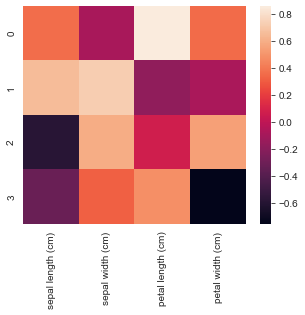

In [69]:
# visualize heatmap to check intensity

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

sb.heatmap(comps)